In [1]:
import time

import numpy as np
import pandas as pd
import seaborn as sns

from uncertainties import ufloat
from ctypes import c_double

import ROOT
ROOT.EnableImplicitMT()    # Tells ROOT to go parallel

cling::DynamicLibraryManager::loadLibrary(): libGL.so.1: cannot open shared object file: No such file or directory
Error in <AutoloadLibraryMU>: Failed to load library /groups/hephy/cms/alikaan.gueven/conda/envs/coffea_torch2/lib/libEve.so.6.28.00cling JIT session error: Failed to materialize symbols: { (main, { _ZeqRK7TStringRKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE }) }


Welcome to JupyROOT 6.28/00


In [ ]:
import SoftDisplacedVertices.Samples.Samples as s
bkg_strs = []
for sp in [*s.wlnu_2018, *s.znunu_2018, *s.qcd_2018]:
    bkg_strs.append(sp.name)

sig_strs = []
for sp in [*s.c1n2_2018, *s.stop_2018]:
    sig_strs.append(sp.name)

hist_dir = "/scratch-cbe/users/alikaan.gueven/2018_limits"

sig_tFileDict = {}
bkg_tFileDict = {}

sig_histDict = {}
bkg_histDict = {}


for sig_str in sig_strs:
    sig_tFileDict[sig_str] = ROOT.TFile(os.path.join(dir, f"{sig_str}_hist.root"))
    sig_histDict[sig_str] = sig_tFileDict[sig_str].All_evt.MET_pt_vs_SPMaxLxySig.Clone()
for bkg_str in bkg_strs:
    sig_tFileDict[bkg_str] = ROOT.TFile(os.path.join(dir, f"{bkg_str}_hist.root"))
    bkg_histDict[sig_str] = bkg_tFileDict[bkg_str].All_evt.MET_pt_vs_SPMaxLxySig.Clone()


MET_boundaryList = range(400, 1000+1, 50)
LxySig_boundaryList = np.arange(0.80, 1, 0.002)


In [3]:
import os
# dir = "/scratch-cbe/users/alikaan.gueven/AngPlotter_out/regions/felixCuts/fineRes"
dir = "/scratch-cbe/users/alikaan.gueven/ML_KAAN/test/"

sig_tFileDict = {
    "stop_600_580_2" : ROOT.TFile(os.path.join(dir, "stop_M600_580_ct2_2018_hist.root")),
    "stop_600_585_20" : ROOT.TFile(os.path.join(dir, "stop_M600_585_ct20_2018_hist.root")),
    "stop_600_588_200" : ROOT.TFile(os.path.join(dir, "stop_M600_588_ct200_2018_hist.root")),
    "stop_1000_980_2" : ROOT.TFile(os.path.join(dir, "stop_M1000_980_ct2_2018_hist.root")),
    "stop_1000_985_20" : ROOT.TFile(os.path.join(dir, "stop_M1000_985_ct20_2018_hist.root")),
    "stop_1000_988_200" : ROOT.TFile(os.path.join(dir, "stop_M1000_988_ct200_2018_hist.root")),
                                    
}

bkg_tFileDict = {
    # "wjetstolnuht0070_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0070_2018_hist.root")),
    "wjetstolnuht0100_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0100_2018_hist.root")),
    "wjetstolnuht0200_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0200_2018_hist.root")),
    "wjetstolnuht0400_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0400_2018_hist.root")),
    "wjetstolnuht0600_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0600_2018_hist.root")),
    "wjetstolnuht0800_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht0800_2018_hist.root")),
    "wjetstolnuht1200_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht1200_2018_hist.root")),
    "wjetstolnuht2500_2018" : ROOT.TFile(os.path.join(dir, "wjetstolnuht2500_2018_hist.root")),

    "zjetstonunuht0100_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht0100_2018_hist.root")),
    "zjetstonunuht0200_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht0200_2018_hist.root")),
    "zjetstonunuht0400_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht0400_2018_hist.root")),
    "zjetstonunuht0600_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht0600_2018_hist.root")),
    "zjetstonunuht0800_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht0800_2018_hist.root")),
    "zjetstonunuht1200_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht1200_2018_hist.root")),
    "zjetstonunuht2500_2018" : ROOT.TFile(os.path.join(dir, "zjetstonunuht2500_2018_hist.root")),
}



sig_histDict = {
    "stop_600_580_2" : sig_tFileDict["stop_600_580_2"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "stop_600_585_20" : sig_tFileDict["stop_600_585_20"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "stop_600_588_200" : sig_tFileDict["stop_600_588_200"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "stop_1000_980_2" : sig_tFileDict["stop_1000_980_2"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "stop_1000_985_20" : sig_tFileDict["stop_1000_985_20"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "stop_1000_988_200" : sig_tFileDict["stop_1000_988_200"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
}


bkg_histDict = {
    # "wjetstolnuht0070_2018" : bkg_tFileDict["wjetstolnuht0070_2018"].SP_evt.MET_pt_vs_SPMaxLxySig.Clone(),
    "wjetstolnuht0100_2018" : bkg_tFileDict["wjetstolnuht0100_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht0200_2018" : bkg_tFileDict["wjetstolnuht0200_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht0400_2018" : bkg_tFileDict["wjetstolnuht0400_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht0600_2018" : bkg_tFileDict["wjetstolnuht0600_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht0800_2018" : bkg_tFileDict["wjetstolnuht0800_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht1200_2018" : bkg_tFileDict["wjetstolnuht1200_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "wjetstolnuht2500_2018" : bkg_tFileDict["wjetstolnuht2500_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),

    "zjetstonunuht0100_2018" : bkg_tFileDict["zjetstonunuht0100_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht0200_2018" : bkg_tFileDict["zjetstonunuht0200_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht0400_2018" : bkg_tFileDict["zjetstonunuht0400_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht0600_2018" : bkg_tFileDict["zjetstonunuht0600_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht0800_2018" : bkg_tFileDict["zjetstonunuht0800_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht1200_2018" : bkg_tFileDict["zjetstonunuht1200_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
    "zjetstonunuht2500_2018" : bkg_tFileDict["zjetstonunuht2500_2018"].All_evt.MET_pt_vs_ev_ParT_241.Clone(),
}

In [4]:
def sig(s,b,b_err):
  return np.sqrt(2*((s+b)*np.log(((s+b)*(b+b_err*b_err))/(b*b+(s+b)*b_err*b_err+1e-100)) - 
                    (b*b/(b_err*b_err + 1e-100))*np.log(1+(b_err*b_err*s)/(b*(b+b_err*b_err)+1e-100))))

In [5]:
MET_boundaryList = range(400, 1000+1, 50)
LxySig_boundaryList = np.arange(0.80, 1, 0.002)

In [6]:
# h = bkg_tFileDict["wjetstolnuht0600_2018"].SP_evt.MET_pt_vs_SPMaxLxySig.Clone()
# # h.Scale(1/h.Integral())
# c2 = ROOT.TCanvas("c1","myCanvas1",600,400)
# c2.SetLogz()
# h.Draw("COLZ")
# 
# lastBinX = h.GetNbinsX()
# lastBinY = h.GetNbinsY()
# h.GetXaxis().SetRangeUser(-1, h.GetXaxis().GetBinLowEdge(lastBinX+1) + h.GetXaxis().GetBinWidth(lastBinX+1))
# h.GetYaxis().SetRangeUser(-1, h.GetYaxis().GetBinLowEdge(lastBinY+1) + h.GetYaxis().GetBinWidth(lastBinY+1))
# h.SetMaximum(1)
# 
# c2.Draw()

In [7]:
MET_step = MET_boundaryList[1] - MET_boundaryList[0]
LxySig_step = LxySig_boundaryList[1] - LxySig_boundaryList[0]

sigTable = pd.DataFrame(columns=range(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                 index=  np.arange(LxySig_boundaryList[0], LxySig_boundaryList[-1]+LxySig_step, LxySig_step),
                 dtype= float)

bkgTable = pd.DataFrame(columns=range(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                 index=  np.arange(LxySig_boundaryList[0], LxySig_boundaryList[-1]+LxySig_step, LxySig_step),
                 dtype= float)

bkgpredTable = pd.DataFrame(columns=range(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                 index=  np.arange(LxySig_boundaryList[0], LxySig_boundaryList[-1]+LxySig_step, LxySig_step),
                 dtype= float)

signifTable = pd.DataFrame(columns=range(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                 index=  np.arange(LxySig_boundaryList[0], LxySig_boundaryList[-1]+LxySig_step, LxySig_step),
                 dtype= float)

signifpredTable = pd.DataFrame(columns=range(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                 index=  np.arange(LxySig_boundaryList[0], LxySig_boundaryList[-1]+LxySig_step, LxySig_step),
                 dtype= float)

store = pd.HDFStore(os.path.join(dir, 'dataframes.h5'))

for sig_tag, sig_hist in sig_histDict.items():
    
    for MET_boundary in MET_boundaryList:
        for LxySig_boundary in LxySig_boundaryList:
            allBkg_SPRA = 0
            allBkg_SPRB = 0
            allBkg_SPRC = 0
            allBkg_SPRD = 0
            for tag, hist in bkg_histDict.items():
                # print(tag)
                MET_lo = -1
                MET_up = hist.GetNbinsX()+1
                MET_bound = hist.GetXaxis().FindBin(MET_boundary)
                
                LxySig_lo = -1
                LxySig_up = hist.GetNbinsY()+1
                LxySig_bound = hist.GetYaxis().FindBin(LxySig_boundary)
                
                x = c_double(0.0)
                SPRA = ufloat(hist.IntegralAndError(MET_bound, MET_up, LxySig_bound, LxySig_up, x), x.value)
                SPRB = ufloat(hist.IntegralAndError(MET_bound, MET_up, LxySig_lo, LxySig_bound-1, x), x.value)
                SPRC = ufloat(hist.IntegralAndError(MET_lo, MET_bound-1, LxySig_bound, LxySig_up, x), x.value)
                SPRD = ufloat(hist.IntegralAndError(MET_lo, MET_bound-1, LxySig_lo, LxySig_bound-1, x), x.value)
            
                allBkg_SPRA += SPRA
                allBkg_SPRB += SPRB
                allBkg_SPRC += SPRC
                allBkg_SPRD += SPRD

            # print((allBkg_SPRA + allBkg_SPRB + allBkg_SPRC + allBkg_SPRD).n)
            # print(allBkg_SPRA,allBkg_SPRB,allBkg_SPRC,allBkg_SPRD)
            
            bkgEventYield = allBkg_SPRA
            bkgEventYield_pred = allBkg_SPRB / allBkg_SPRD * allBkg_SPRC
            
            ### SIGNAL PART
            MET_lo = -1
            MET_up = sig_hist.GetNbinsX()+1
            MET_bound = sig_hist.GetXaxis().FindBin(MET_boundary)
            
            LxySig_lo = -1
            LxySig_up = sig_hist.GetNbinsY()+1
            LxySig_bound = sig_hist.GetYaxis().FindBin(LxySig_boundary)
            
            x = c_double(0.0)
            SPRA = ufloat(sig_hist.IntegralAndError(MET_bound, MET_up, LxySig_bound, LxySig_up, x), x.value)
            SPRB = ufloat(sig_hist.IntegralAndError(MET_bound, MET_up, LxySig_lo, LxySig_bound-1, x), x.value)
            SPRC = ufloat(sig_hist.IntegralAndError(MET_lo, MET_bound-1, LxySig_bound, LxySig_up, x), x.value)
            SPRD = ufloat(sig_hist.IntegralAndError(MET_lo, MET_bound-1, LxySig_lo, LxySig_bound-1, x), x.value)
    
            sigEventYield = SPRA
            if MET_boundary==600 and LxySig_boundary==40:
                print(sig_tag)
                print((SPRA + SPRB +SPRC +SPRD).n)

            sigTable.loc[LxySig_boundary, MET_boundary] = round(sigEventYield.n, 3)
            bkgTable.loc[LxySig_boundary, MET_boundary] = round(bkgEventYield.n, 3)
            bkgpredTable.loc[LxySig_boundary, MET_boundary] = round(bkgEventYield_pred.n, 3)
            # if LxySig_boundary==20 and MET_boundary==650:
            #     print(bkgEventYield.s)
            # signifTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield.n, bkgEventYield.s), 3)
            # signifpredTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield_pred.n, bkgEventYield_pred.s), 3)
            # signifTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield.n, 1e-50), 3)
            # signifpredTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield_pred.n, 1e-50), 3)

            signifTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield.n, 0.20 * bkgEventYield.n), 3)
            signifpredTable.loc[LxySig_boundary, MET_boundary] = round(sig(sigEventYield.n, bkgEventYield_pred.n, 0.20 * bkgEventYield.n), 3)
            # signifTable.loc[LxySig_boundary, MET_boundary] = round(sigEventYield.n / np.sqrt(bkgEventYield.n), 3)
            # signifpredTable.loc[LxySig_boundary, MET_boundary] = round(sigEventYield.n / np.sqrt(bkgEventYield_pred.n), 3)
    
    
    store[sig_tag + '_sigTable'] = sigTable                    # save it
    store[sig_tag + '_bkgTable'] = bkgTable                    # save it
    store[sig_tag + '_bkgpredTable'] = bkgpredTable            # save it
    store[sig_tag + '_signifTable'] = signifTable              # save it
    store[sig_tag + '_signifpredTable'] = signifpredTable      # save it
    
# signifTable

In [8]:
# c1 = ROOT.TCanvas()
# tfile = ROOT.TFile(os.path.join(dir, "stop_M600_580_ct2_2018_hist.root"))
# thist = tfile.SP_SDVSecVtx_all.SDVSecVtx_mass.Clone()
# 
# # thist.GetXaxis().SetRangeUser(100, 600) 
# # thist.GetYaxis().SetRangeUser(100, 600) 
# thist.Draw("HIST")
# c1.Draw()




# print(thist.GetEntries())
# for i in tfile.GetListOfKeys():
#     print(i)

In [9]:
# store.close()
store.keys()

['/stop_1000_980_2_bkgTable',
 '/stop_1000_980_2_bkgpredTable',
 '/stop_1000_980_2_sigTable',
 '/stop_1000_980_2_signifTable',
 '/stop_1000_980_2_signifpredTable',
 '/stop_1000_985_20_bkgTable',
 '/stop_1000_985_20_bkgpredTable',
 '/stop_1000_985_20_sigTable',
 '/stop_1000_985_20_signifTable',
 '/stop_1000_985_20_signifpredTable',
 '/stop_1000_988_200_bkgTable',
 '/stop_1000_988_200_bkgpredTable',
 '/stop_1000_988_200_sigTable',
 '/stop_1000_988_200_signifTable',
 '/stop_1000_988_200_signifpredTable',
 '/stop_600_580_2_bkgTable',
 '/stop_600_580_2_bkgpredTable',
 '/stop_600_580_2_sigTable',
 '/stop_600_580_2_signifTable',
 '/stop_600_580_2_signifpredTable',
 '/stop_600_585_20_bkgTable',
 '/stop_600_585_20_bkgpredTable',
 '/stop_600_585_20_sigTable',
 '/stop_600_585_20_signifTable',
 '/stop_600_585_20_signifpredTable',
 '/stop_600_588_200_bkgTable',
 '/stop_600_588_200_bkgpredTable',
 '/stop_600_588_200_sigTable',
 '/stop_600_588_200_signifTable',
 '/stop_600_588_200_signifpredTable']

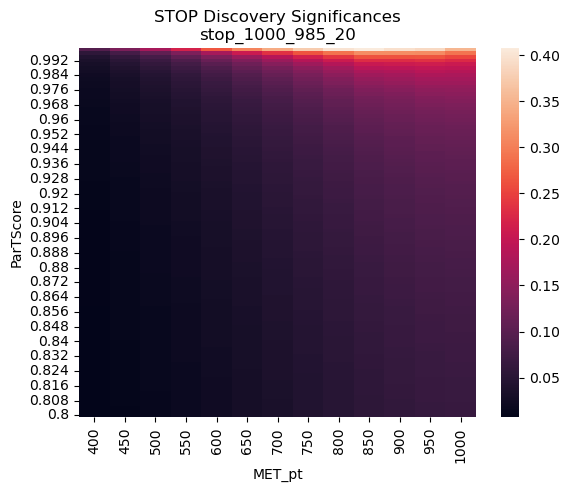

In [22]:
tag = 'stop_1000_985_20'

s = sns.heatmap(store[tag + '_signifpredTable'])
s.set(xlabel='MET_pt', ylabel='ParTScore', title='STOP Discovery Significances\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

In [23]:
from matplotlib.colors import LogNorm, Normalize

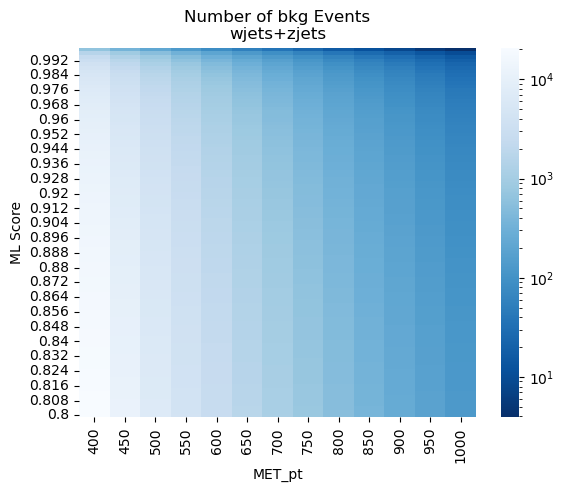

In [34]:
tag = 'stop_1000_985_20'

s = sns.heatmap(store[tag + '_bkgTable'], norm=LogNorm(), cmap='Blues_r')
s.set(xlabel='MET_pt', ylabel='ML Score', title='Number of bkg Events\n'+"wjets+zjets");
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

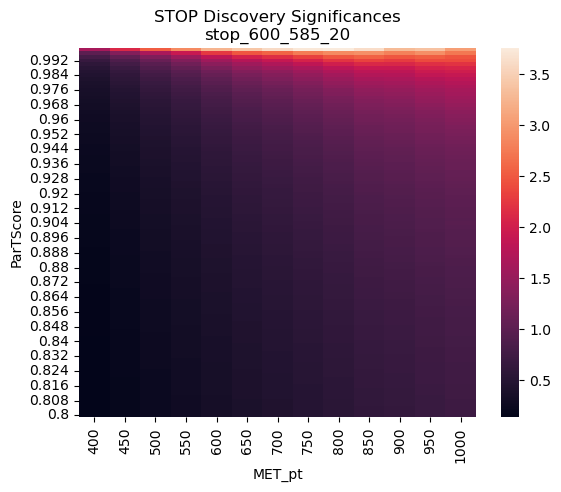

In [25]:
tag = 'stop_600_585_20'

s = sns.heatmap(store[tag + '_signifTable'])
s.set(xlabel='MET_pt', ylabel='ParTScore', title='STOP Discovery Significances\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

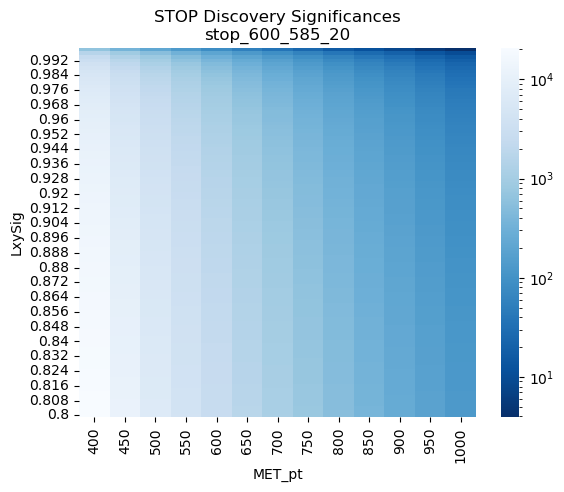

In [29]:
tag = 'stop_600_585_20'

s = sns.heatmap(store[tag + '_bkgTable'], norm=LogNorm(), cmap='Blues_r')
s.set(xlabel='MET_pt', ylabel='LxySig', title='STOP Discovery Significances\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

In [26]:
store[tag + '_signifTable']

,400,450,500,550,600,650,700,750,800,850,900,950,1000
0.800,0.138,0.185,0.238,0.286,0.342,0.398,0.441,0.489,0.540,0.603,0.630,0.677,0.718
0.802,0.138,0.186,0.239,0.287,0.343,0.400,0.443,0.491,0.541,0.604,0.631,0.677,0.720
0.804,0.139,0.187,0.240,0.288,0.345,0.401,0.445,0.493,0.543,0.605,0.632,0.680,0.723
0.806,0.139,0.188,0.241,0.290,0.346,0.403,0.447,0.495,0.545,0.607,0.635,0.683,0.727
0.808,0.140,0.189,0.242,0.291,0.348,0.405,0.449,0.497,0.548,0.610,0.638,0.686,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.990,0.584,0.779,0.987,1.185,1.398,1.570,1.696,1.847,2.004,2.112,2.094,2.190,2.213
0.992,0.664,0.880,1.111,1.327,1.569,1.753,1.901,2.059,2.220,2.335,2.283,2.390,2.401
0.994,0.792,1.043,1.311,1.553,1.835,2.037,2.163,2.322,2.479,2.564,2.483,2.536,2.470
0.996,1.015,1.328,1.661,1.923,2.258,2.475,2.586,2.759,2.881,2.939,2.811,2.925,2.735


In [27]:
store[tag + '_sigTable']

,400,450,500,550,600,650,700,750,800,850,900,950,1000
0.800,580.205,437.845,330.571,244.732,185.135,140.630,104.391,78.726,60.366,47.293,35.470,27.876,21.724
0.802,579.725,437.557,330.379,244.636,185.039,140.533,104.295,78.630,60.270,47.197,35.374,27.780,21.724
0.804,579.244,437.365,330.283,244.540,184.943,140.437,104.199,78.533,60.174,47.101,35.278,27.780,21.724
0.806,579.052,437.173,330.090,244.540,184.943,140.437,104.199,78.533,60.174,47.101,35.278,27.780,21.724
0.808,578.860,436.980,329.898,244.444,184.847,140.341,104.199,78.533,60.174,47.101,35.278,27.780,21.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.990,447.842,338.838,256.844,191.479,144.955,109.005,80.937,61.135,47.389,36.816,27.780,22.301,17.398
0.992,426.695,322.208,243.867,181.675,137.458,103.622,77.284,58.732,45.467,35.278,26.530,21.340,16.533
0.994,398.338,301.061,227.910,169.467,128.614,96.509,71.516,54.214,41.910,32.298,24.127,19.129,14.515
0.996,346.720,261.746,199.650,147.358,111.312,82.763,61.231,46.716,36.047,27.588,20.571,16.629,12.400


In [16]:
store[tag + '_bkgTable']

,400,450,500,550,600,650,700,750,800,850,900,950,1000
0.800,20891.106,11658.510,6834.103,4191.988,2636.419,1707.880,1136.388,766.360,527.387,364.807,257.648,184.884,132.236
0.802,20785.477,11600.960,6800.250,4170.853,2622.759,1699.369,1130.529,762.579,524.703,363.233,256.600,184.137,131.832
0.804,20681.468,11541.997,6764.447,4148.529,2610.222,1691.599,1125.535,759.226,522.676,361.976,255.439,183.313,131.256
0.806,20583.932,11486.162,6731.185,4128.145,2598.258,1683.278,1120.212,755.731,520.166,360.283,254.021,182.177,130.463
0.808,20474.328,11427.286,6698.609,4107.486,2584.907,1674.671,1114.499,752.090,517.554,358.598,252.882,181.418,129.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.990,3677.629,2052.594,1207.527,735.173,460.968,301.281,201.555,134.893,92.114,64.496,46.654,33.273,23.590
0.992,3060.706,1714.446,1007.831,615.649,383.260,251.570,167.686,112.991,77.078,53.594,39.056,27.569,19.285
0.994,2373.128,1335.484,785.753,481.051,299.046,195.621,131.863,88.787,60.579,42.251,30.588,21.659,15.205
0.996,1586.327,891.713,527.317,326.089,201.071,130.686,88.572,59.476,40.883,28.147,20.247,13.837,9.873


In [ ]:
store[tag + '_bkgpredTable']

In [ ]:
# d.to_csv(sep = "|")
tableName = tag + '_bkgTable'
print(f"Printing {tableName} \n")
d = store[tableName]
s = d.to_markdown()
s = "| ParTScore/MET_pt" + s[6:]
print(s)

In [ ]:
for key in bkg_histDict.keys():
    print(key)

In [ ]:
c = ROOT.TCanvas("c1","myCanvas1",600,600)
h = bkg_histDict['zjetstonunuht2500_2018']
h.Draw("COLZ")
h.GetXaxis().SetRange(-1, 1000)
h.GetYaxis().SetRange(-1, 1000)
c.Draw()

In [ ]:
sig(15.903, 4.079, 0.4513)

In [ ]:
sig(5, 4.079, 0.4513)

In [ ]:
5 / 15.903

In [ ]:
store[tag + '_sigTable']

In [ ]:
tag = 'stop_1000_980_2'

s = sns.heatmap(store[tag + '_bkgTable'], cmap="Blues_r")
s.set(xlabel='MET_pt', ylabel='LxySig', title='STOP Events\n'+tag);
s.invert_yaxis();

In [ ]:
# d.to_csv(sep = "|")
tag = 'stop_1000_980_2'
d = store[tag + '_bkgTable']
s = d.to_markdown()
s = "| LxySig/MET_pt " + s[6:]

In [ ]:
print(f"{s}")

In [ ]:
# hist.GetYaxis().GetBinUpEdge(hist.GetYaxis().GetNbins())

In [ ]:
store['stop_1000_988_200_sigTable']

In [ ]:
store['stop_1000_988_200_bkgTable']

In [ ]:
store['stop_1000_988_200_signifTable']

In [ ]:
def sig(s,b,b_err):
  return np.sqrt(2*((s+b)*np.log(((s+b)*(b+b_err*b_err))/(b*b+(s+b)*b_err*b_err)) - 
                    (b*b/(b_err*b_err))*np.log(1+(b_err*b_err*s)/(b*(b+b_err*b_err)))))

In [ ]:
sig(0.2, 0.5, 1e-154)

In [ ]:
0.2 / np.sqrt(0.5)